In [33]:
import mujoco
import mediapy as media
import numpy as np

model = mujoco.MjModel.from_xml_path("../robot_models/kuka_iiwa/scene.xml")
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

DURATION = 3    # seconds 
FRAMERATE = 30  # Hz

# Create and configure camera
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 2  

# Reset to home position defined in keyframe
mujoco.mj_resetDataKeyframe(model, data, 1)

frames = []
while data.time < DURATION:
    # Keep all joints at current position except last one
    data.ctrl = data.qpos.copy()
    data.ctrl[0] += np.random.randn() * 9  # Random offset only for last joint
    
    # Step simulation
    mujoco.mj_step(model, data)
    # Render and save frames
    if len(frames) < data.time * FRAMERATE:
        # Set camera to look at link3
        camera.lookat = data.body('link3').subtree_com
        
        renderer.update_scene(data, camera)
        pixels = renderer.render()
        frames.append(pixels)

# Display animation
media.show_video(frames, fps=FRAMERATE)


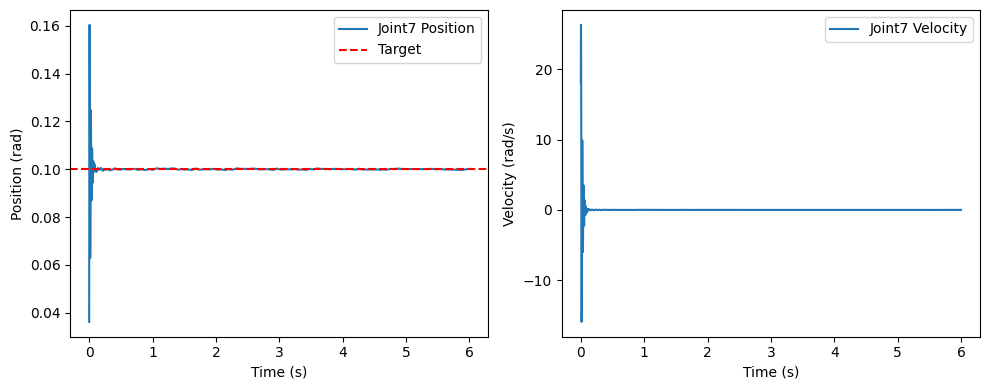

In [29]:
import matplotlib.pyplot as plt
actuator_index = 6

# Set initial control targets for all actuators
data.ctrl[:] = 0.0

# Run simulation for a few steps to get initial state
for _ in range(100):
    mujoco.mj_step(model, data)

# Record data lists for analysis
time_steps = []
joint7_positions = []
joint7_velocities = []
applied_controls = []

# Simulation settings
dt = model.opt.timestep
simulation_steps = 3000

# Apply a step command to joint7
desired_setpoint = 0.1  # radians
data.ctrl[actuator_index] = desired_setpoint

for step in range(simulation_steps):
    mujoco.mj_step(model, data)
    time_steps.append(step * dt)
    # Access joint state by name or index. Here we assume joint7 index is 6.
    joint7_positions.append(data.qpos[6])
    joint7_velocities.append(data.qvel[6])
    applied_controls.append(data.actuator_force[actuator_index])  # if available

# Plot the response
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time_steps, joint7_positions, label='Joint7 Position')
plt.axhline(desired_setpoint, color='r', linestyle='--', label='Target')
plt.xlabel("Time (s)")
plt.ylabel("Position (rad)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_steps, joint7_velocities, label='Joint7 Velocity')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (rad/s)")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
print(model.nu)

7


In [12]:
import pandas as pd
columns = ["Frame", "Link", "Parent", "X_Position", "X_Rotation", "X_Velocity",
           "Y_Position", "Y_Rotation", "Y_Velocity", "Z_Position", "Z_Rotation", "Z_Velocity"]

df = pd.DataFrame(output_data, columns=columns)

In [13]:
df.head()

,Frame,Link,Parent,X_Position,X_Rotation,X_Velocity,Y_Position,Y_Rotation,Y_Velocity,Z_Position,Z_Rotation,Z_Velocity
0,1,world,world,0.0,0,0.0,0.0,0,0.0,0.0000,0,0.0
1,1,base,world,0.0,0,0.0,0.0,0,0.0,0.0000,0,0.0
2,1,link1,base,0.0,0,0.0,0.0,0,0.0,0.1575,0,0.0
3,1,link2,link1,0.0,0,0.0,0.0,0,0.0,0.3600,0,0.0
4,1,link3,link2,0.0,0,0.0,0.0,0,0.0,0.5645,0,0.0


In [14]:
[print(model.body(i).name) for i in range(model.nbody)]

world
base
link1
link2
link3
link4
link5
link6
link7


[None, None, None, None, None, None, None, None, None]

In [15]:
data.qpos

array([ 1.29587779e-09, -2.50854156e-08,  2.41126456e-09, -2.65911264e-08,
        1.70224507e-09,  2.84170280e-09, -1.34897442e-11])

In [16]:
data.xpos

array([[0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.1575],
       [0.    , 0.    , 0.36  ],
       [0.    , 0.    , 0.5645],
       [0.    , 0.    , 0.78  ],
       [0.    , 0.    , 0.9645],
       [0.    , 0.    , 1.18  ],
       [0.    , 0.    , 1.261 ]])